In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_paths = [
    '/content/states0.csv', '/content/states1.csv', '/content/states2.csv', '/content/states3.csv', '/content/states4.csv',
    '/content/states5.csv', '/content/states6.csv', '/content/states7.csv', '/content/states8.csv', '/content/states9.csv'
]

In [ ]:
#Load all csv files inta a list of Data Frame
dfs = [pd.read_csv(file_path) for file_path in file_paths]

In [ ]:
us_census = pd.concat(dfs, ignore_index=True)

In [ ]:
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [ ]:
# Drop the unnamed 0 column
us_census.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
us_census.head(2)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F


In [ ]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      60 non-null     object
 1   TotalPop   60 non-null     int64 
 2   Hispanic   60 non-null     object
 3   White      60 non-null     object
 4   Black      60 non-null     object
 5   Native     60 non-null     object
 6   Asian      60 non-null     object
 7   Pacific    55 non-null     object
 8   Income     60 non-null     object
 9   GenderPop  60 non-null     object
dtypes: int64(1), object(9)
memory usage: 4.8+ KB


In [ ]:
def clean_percentage(value):
  if isinstance(value, str):
    return float(value.replace('%', ''))
  return value

In [ ]:
us_census['Hispanic'] = us_census['Hispanic'].str.replace('%', '').astype(float)
us_census['White'] = us_census['White'].str.replace('%', '').astype(float)
us_census['Black'] = us_census['Black'].str.replace('%', '').astype(float)
us_census['Native'] = us_census['Native'].str.replace('%', '').astype(float)
us_census['Asian'] = us_census['Asian'].str.replace('%', '').astype(float)
us_census['Pacific'] = us_census['Pacific'].str.replace('%', '').astype(float)

In [ ]:
us_census['Income'] = us_census['Income'].str.replace('$', '').astype(float)

In [ ]:
us_census.head(2)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F


In [ ]:
# us_census["males"], us_census["females"] = us_census.GenderPop.str.split("_").str[0], us_census.GenderPop.str.split("_").str[1]
# us_census["males"] = us_census["males"].str.replace("M", "").astype(int)
# us_census["females"] = us_census["females"].str.replace("F", "").astype(int)

In [ ]:
# Extract Male and Female population from GenderPop
us_census['Male'] = us_census['GenderPop'].str.extract(r'(\d+)M').fillna(0).astype(int)
us_census['Female'] = us_census['GenderPop'].str.extract(r'(\d+)F').fillna(0).astype(int)

In [ ]:
us_census.head(2)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,males,females,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2341093,2489527F,2489527
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,384160,349215F,349215


In [ ]:
# del us_census['GenderPop']

In [ ]:
# Delete multiple columns using the drop method
us_census.drop(columns=['GenderPop'], inplace=True)

In [ ]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Male', 'Female'],
      dtype='object')

In [ ]:
#get 0 value in Female column
us_census[us_census['Female'] == 0]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
23,Maryland,5930538,8.472498,52.679050,30.677754,0.203096,5.325414,0.036285,78765.400725,2872643,0
24,Maryland,5930538,8.472498,52.679050,30.677754,0.203096,5.325414,0.036285,78765.400725,2872643,0
31,Montana,1014699,3.268889,86.415556,0.429259,7.060741,0.570370,0.072222,47645.682836,510163,0


In [ ]:
#You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column,
# you could use the TotalPop of that state minus the Men for that state.
us_census['Female'] = us_census.apply(lambda row: row['TotalPop'] - row['Male'] if (row['Female']) == 0 else row['Female'], axis=1)

In [ ]:
#get 0 value in Female column
us_census[us_census['Female'] == 0]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female


In [ ]:
us_census.duplicated().sum()

np.int64(9)

In [ ]:
us_census[us_census.duplicated()]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
6,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,NaN,64657.801787,2648667,2630239
12,Georgia,10006693,8.418242,54.286306,32.088298,0.187583,3.097649,0.046602,50811.082051,4883331,5123362
18,Iowa,3093526,5.303645,87.719684,3.256987,0.289793,1.699392,0.055164,53017.753041,1534595,1558931
24,Maryland,5930538,8.472498,52.679050,30.677754,0.203096,5.325414,0.036285,78765.400725,2872643,3057895
30,Missouri,6045448,4.037248,77.508069,14.122118,0.363329,1.624496,0.101657,49763.987726,2964003,3081445
36,New Jersey,8904413,18.749500,56.488761,14.387862,0.115335,8.159990,0.031319,76581.083417,4343027,4561386
42,Ohio,11575977,3.672084,75.903060,16.207276,0.168888,1.621081,0.022645,49655.248466,5662893,5913084
48,Rhode Island,1053661,13.356667,74.325417,5.682917,0.346250,3.247500,0.035833,59125.270833,510388,543273
54,Utah,2903379,13.468376,79.406838,1.017949,1.081368,2.196068,0.825983,63488.917808,1459229,1444150


In [ ]:
#drop duplicated values and set the index
us_census = us_census.drop_duplicates().reset_index(drop=True)

In [ ]:
us_census.duplicated().sum()

np.int64(0)

In [ ]:
us_census.isna().sum()

,0
State,0
TotalPop,0
Hispanic,0
White,0
Black,0
Native,0
Asian,0
Pacific,4
Income,0
Male,0


In [ ]:
us_census['Pacific'].median()

0.04277108433734938

In [ ]:
#fill nan values with median
us_census['Pacific'].fillna(us_census['Pacific'].median(), inplace=True)

In [ ]:
us_census.isna().sum()

,0
State,0
TotalPop,0
Hispanic,0
White,0
Black,0
Native,0
Asian,0
Pacific,0
Income,0
Male,0


In [ ]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093,2489527
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160,349215
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088,3342840
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913,1506295
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135,19334329
5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,0.042771,64657.801787,2648667,2630239
6,Connecticut,3593222,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607,1841615
7,Delaware,926454,8.824766,64.632710,20.743925,0.259813,3.268692,0.042771,61827.976636,448413,478041
8,District of Columbia,647484,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674,340810
9,Florida,19645772,21.338543,59.083749,15.165676,0.210451,2.283174,0.051510,50690.194987,9600009,10045763


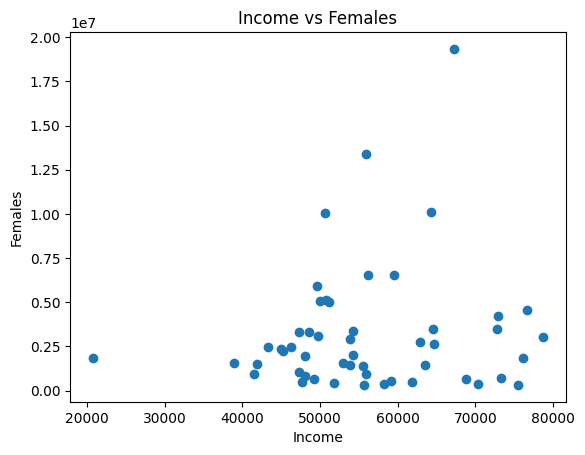

In [ ]:
plt.scatter(x=us_census['Income'], y=us_census['Female'])
plt.xlabel('Income')
plt.ylabel('Females')
plt.title('Income vs Females')
plt.show()

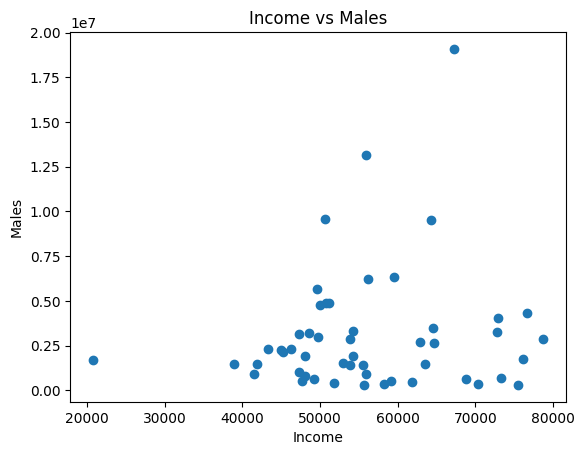

In [ ]:
plt.scatter(x=us_census['Income'], y=us_census['Male'])
plt.xlabel('Income')
plt.ylabel('Males')
plt.title('Income vs Males')
plt.show()

Text(0.5, 1.0, 'Distribution of Hispanic Population')

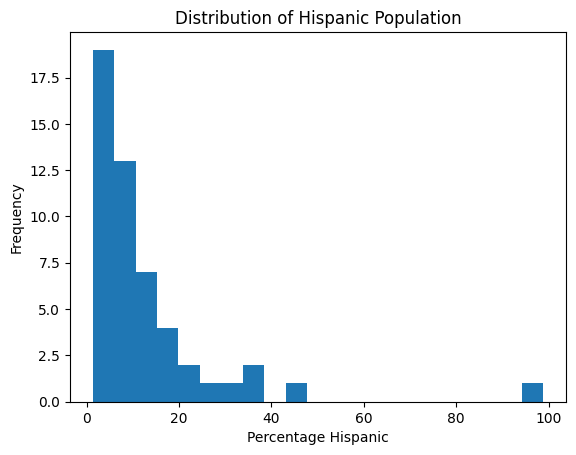

In [ ]:
#Histograms of Races
#Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.
plt.hist(us_census['Hispanic'], bins='auto')  # Adjust 'bins' for desired granularity
plt.xlabel('Percentage Hispanic')
plt.ylabel('Frequency')
plt.title('Distribution of Hispanic Population')


Text(0.5, 1.0, 'Distribution of Hispanic Population')

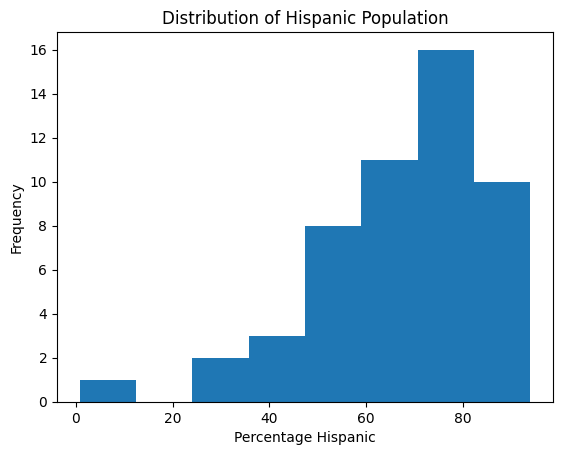

In [ ]:
#Histograms of Races
#Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.
plt.hist(us_census['White'], bins='auto')  # Adjust 'bins' for desired granularity
plt.xlabel('Percentage Hispanic')
plt.ylabel('Frequency')
plt.title('Distribution of Hispanic Population')
